# <font color='purple'>Business Case: Porter: Neural Networks Regression</font>

### <font color='Blue'>About "Porter" :</font>

* Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the countrys 40 billion intra-city logistics market.

* Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence.

### <font color='Blue'>Project Objective :</font>

* This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <font color='Blue'>Importing the dataset and doing usual exploratory analysis steps <br><br>Checking the structure & characteristics of the dataset: </font>

In [ ]:
# import gdown

In [ ]:
# !gdown 1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving porter.csv to porter.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['porter.csv']))
dtest = pd.read_csv(io.BytesIO(uploaded['porter.csv']))

###	<font color='Blue'> Analyzing basic metrics
#### o	Shape of data: Total of 197428 rows × 14 columns
</font>

###	<font color='Blue'> Characteristics of the dataset

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

### Identifying the `Missing values` across the all variables:

In [ ]:
df[df.columns[df.isnull().any()]].isnull().sum()

market_id                     987
actual_delivery_time            7
store_primary_category       4760
order_protocol                995
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [ ]:
# dropna or fillna or dropnull or fillnull
# calcualate total "na" items

df.dropna(inplace=True) #df.fillna(0)

In [ ]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

### Count duplicate rows on entire dataframe:

In [ ]:
len(df)-len(df.drop_duplicates())

0

# <font color='blue'> Performing EDA, Data Cleaning, and Feature Engineering</font>

### 1. Analyzing and visualizing the data
### 2. Getting inferences

## <font color='blue'> Datatype Conversion: </font>
* some columns are "object"
* converted to "datetime64[ns]"
* columns are converted to "float64"

In [ ]:
df['created_at']= pd.to_datetime(df['created_at'])
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'])

### Create new feature time_taken, and time taken mins

In [ ]:
df['time_taken']=df['actual_delivery_time']-df['created_at']
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('1m')

#extract hour and day separately
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

### dropping unused columns, which will not be used:

In [ ]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [ ]:
df.store_primary_category.unique()

array(['american', 'mexican', 'indian', 'italian', 'sandwich', 'thai',
       'cafe', 'salad', 'pizza', 'chinese', 'singaporean', 'burger',
       'mediterranean', 'japanese', 'greek', 'catering', 'filipino',
       'convenience-store', 'other', 'vegan', 'asian', 'barbecue',
       'breakfast', 'fast', 'dessert', 'smoothie', 'seafood',
       'vietnamese', 'cajun', 'steak', 'middle-eastern', 'persian',
       'nepalese', 'korean', 'sushi', 'latin-american', 'chocolate',
       'burmese', 'hawaiian', 'british', 'pasta', 'alcohol', 'vegetarian',
       'dim-sum', 'peruvian', 'turkish', 'ethiopian', 'bubble-tea',
       'german', 'french', 'caribbean', 'gluten-free', 'comfort-food',
       'gastropub', 'afghan', 'pakistani', 'moroccan', 'tapas',
       'malaysian', 'soup', 'brazilian', 'european', 'cheese', 'african',
       'argentine', 'kosher', 'irish', 'spanish', 'russian', 'southern',
       'lebanese', 'belgian', 'alcohol-plus-food'], dtype=object)

In [ ]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

In [ ]:
df.drop(['store_id'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  int8   
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  time_taken_mins           176248 non-null  float64
 12  hour                      176248 non-null  int64  
 13  day                       176248 non-null  i

In [ ]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


In [ ]:
df.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day
count,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
mean,2.743747,35.891482,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800,47.764210,8.493872,3.221563
std,1.330911,20.728572,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344,27.654861,8.681474,2.041332
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,1.683333,0.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,35.083333,2.000000,1.000000
50%,2.000000,38.000000,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,44.366667,3.000000,3.000000
75%,4.000000,55.000000,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000,56.366667,19.000000,5.000000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,6231.316667,23.000000,6.000000


# Univariate Analysis

In [ ]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for
             p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)

# example : with_hue(ax,g1.Content_Type,2,2)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 4 - 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

In [ ]:
sns.set(rc={'figure.figsize':(5.5,5)})

## 1. market_id:

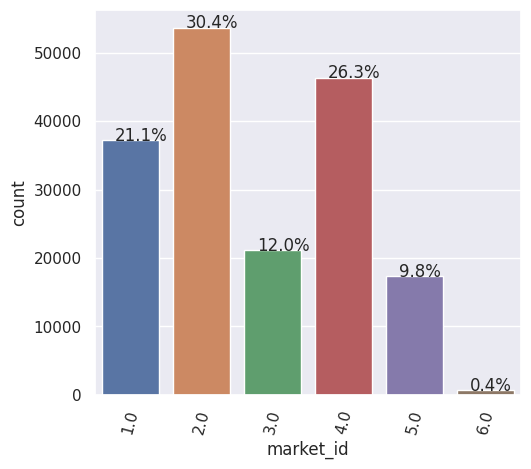

In [ ]:
ax = sns.countplot(data=df,x="market_id")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
without_hue(ax,df.market_id)

## 2. order_protocol :

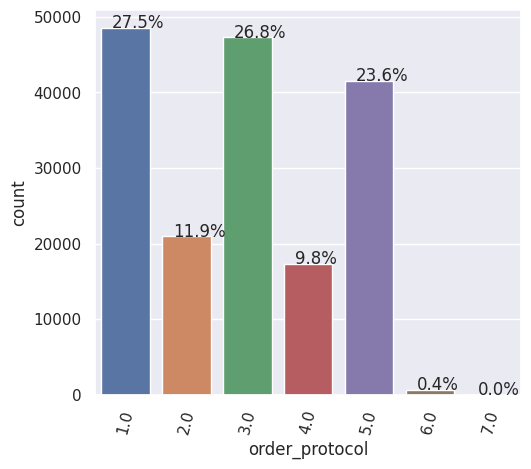

In [ ]:
ax = sns.countplot(data=df,x="order_protocol")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
without_hue(ax,df.order_protocol)

## 3. store_primary_category :

* American store get 10 % of the total orders.
* Followed by Pizza.

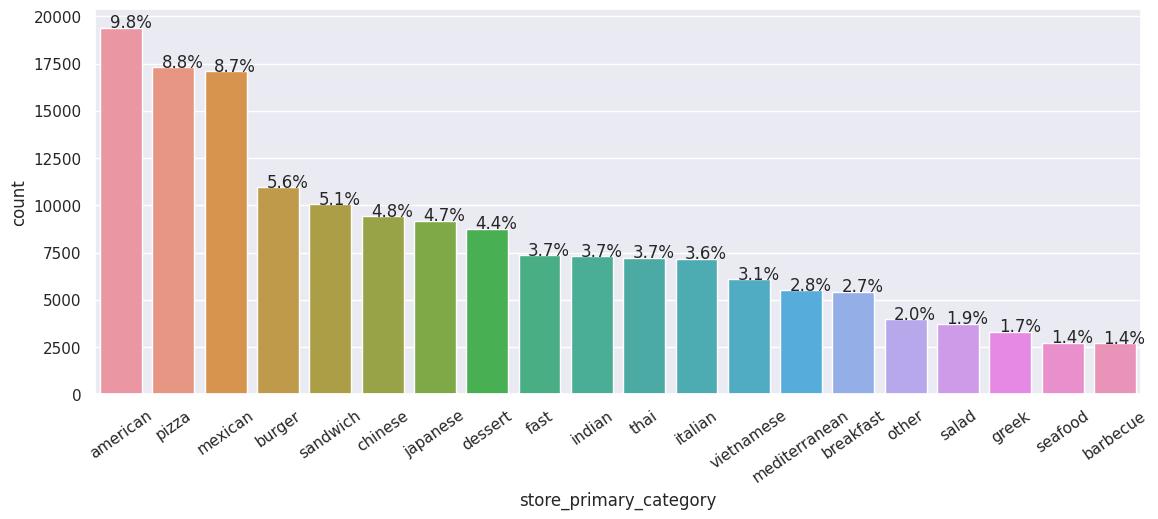

In [ ]:
sns.set(rc={'figure.figsize':(13.5,5)})
ax = sns.countplot(data=dtest,x="store_primary_category", order = dtest['store_primary_category'].value_counts().head(20).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)
without_hue(ax,dtest.store_primary_category)

## 4. num_distinct_items :


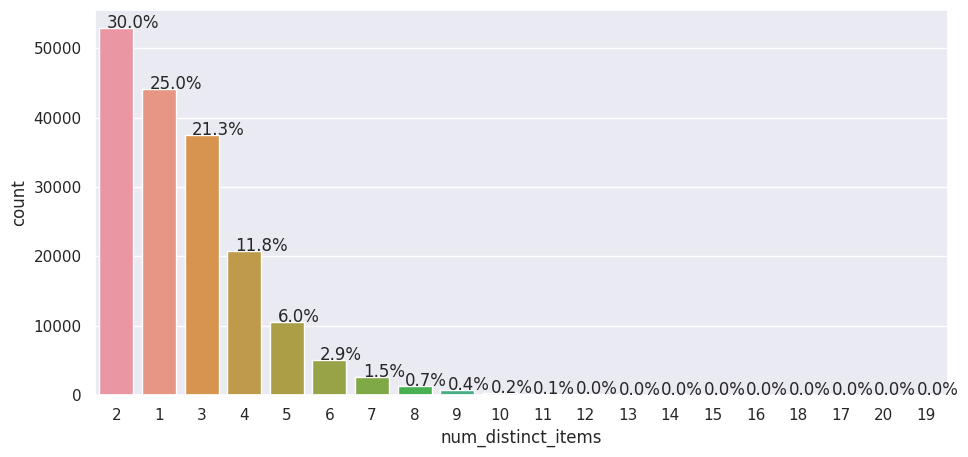

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
ax = sns.countplot(data=df,x="num_distinct_items", order = df['num_distinct_items'].value_counts().head(20).index)
ax.set_xticklabels(ax.get_xticklabels())
without_hue(ax,df.num_distinct_items)

## 5.time_taken_mins

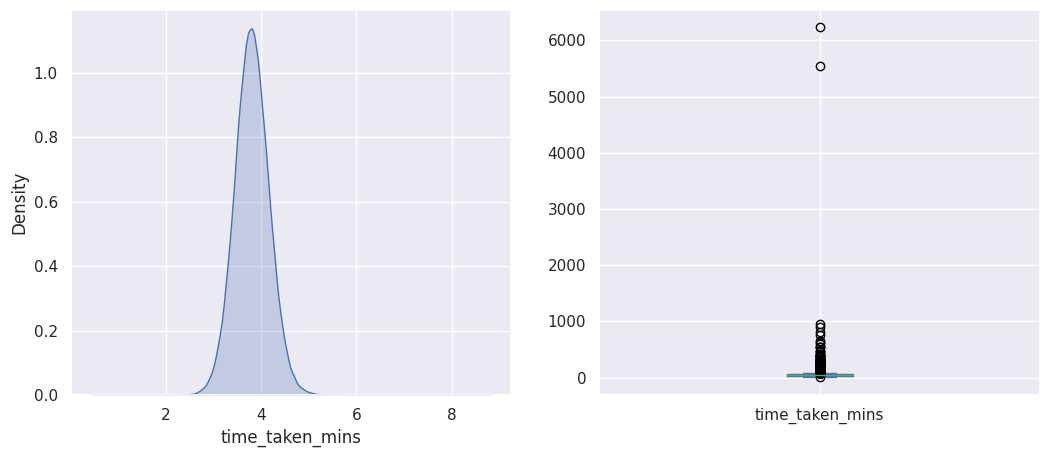

In [ ]:
plt.subplot(121)
sns.kdeplot(np.log(df.time_taken_mins),shade=True)
plt.subplot(122)
df.time_taken_mins.plot.box(figsize=(12.5,5))
plt.show()

## 6. total_onshift_partners :

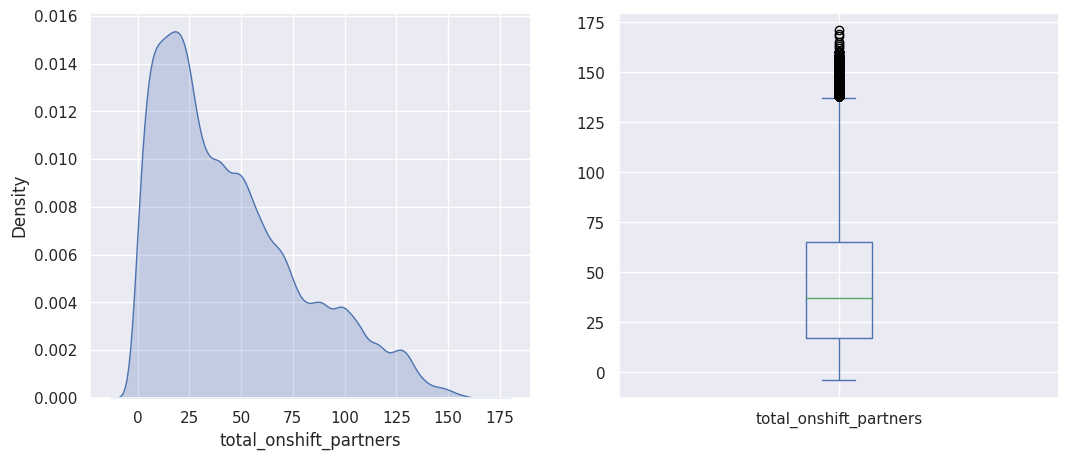

In [ ]:
plt.subplot(121)
sns.kdeplot(df.total_onshift_partners, shade=True)
plt.subplot(122)
df.total_onshift_partners.plot.box(figsize=(12.5,5))
plt.show()

## 7. total_busy_partners :

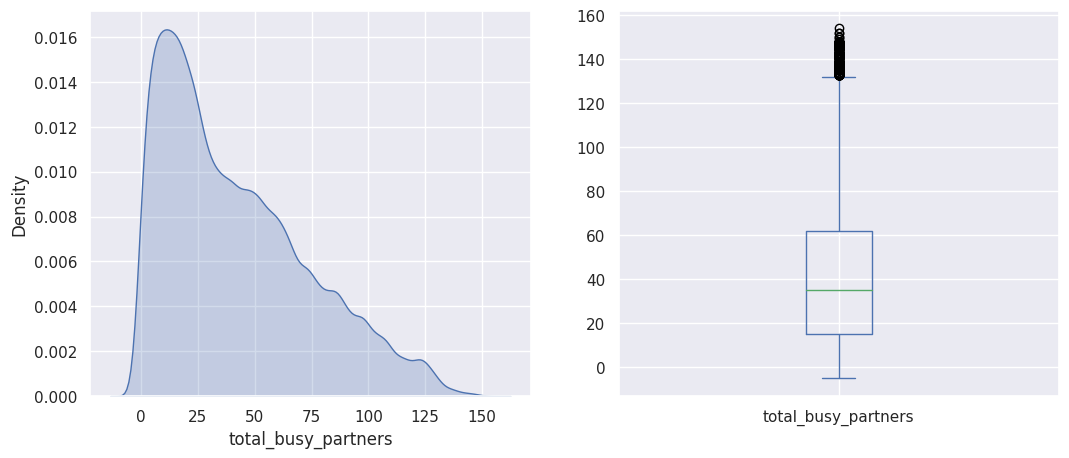

In [ ]:
plt.subplot(121)
sns.kdeplot(df.total_busy_partners, shade=True)
plt.subplot(122)
df.total_busy_partners.plot.box(figsize=(12.5,5))
plt.show()

## 8. day :

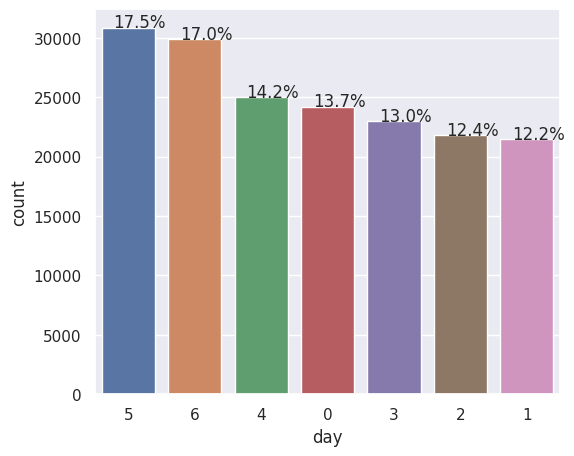

In [ ]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data=df,x="day", order = df['day'].value_counts().head(20).index)
ax.set_xticklabels(ax.get_xticklabels())
without_hue(ax,df.day)

## Heat Map:
* sub total and total items are co-related.
* sub total and total items are inversely co-related.

<Axes: >

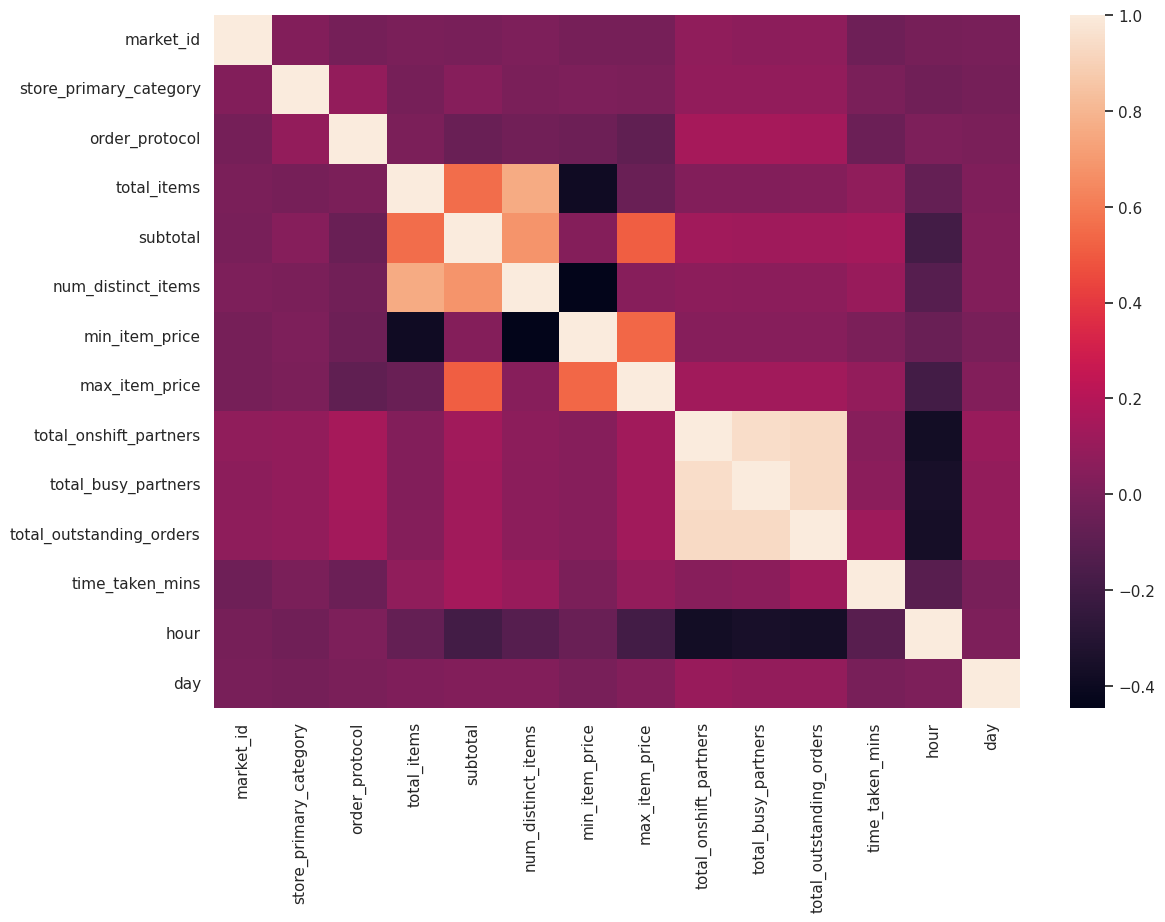

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})
sns.heatmap(df.corr())

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

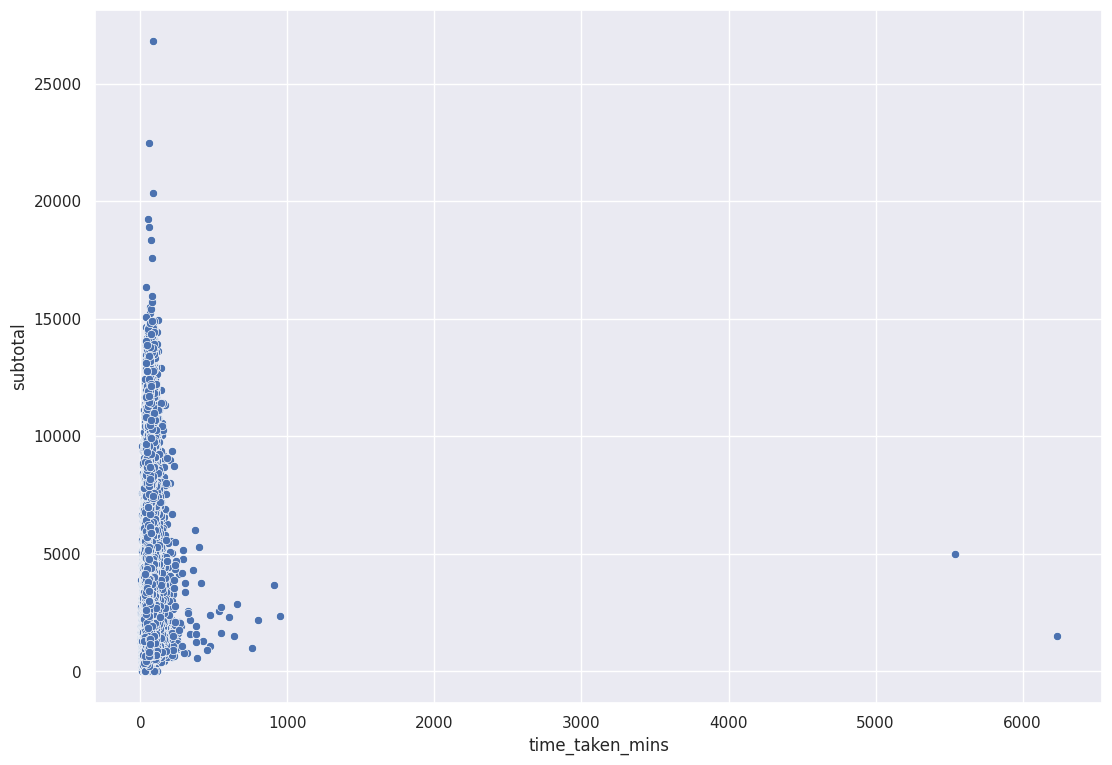

In [ ]:
# 2. Check for outliers
sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

## Outlier Detection:

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model = LocalOutlierFactor()

df['lof_anomaly_score'] = model.fit_predict(df[['subtotal', 'time_taken_mins']])

In [ ]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day,lof_anomaly_score
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,1
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,1
8,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0,1
14,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3,1
15,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,0,1,1
197424,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,0,4,1
197425,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,4,5,1
197426,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,18,6,1


number of outliers :  (5562, 5562)


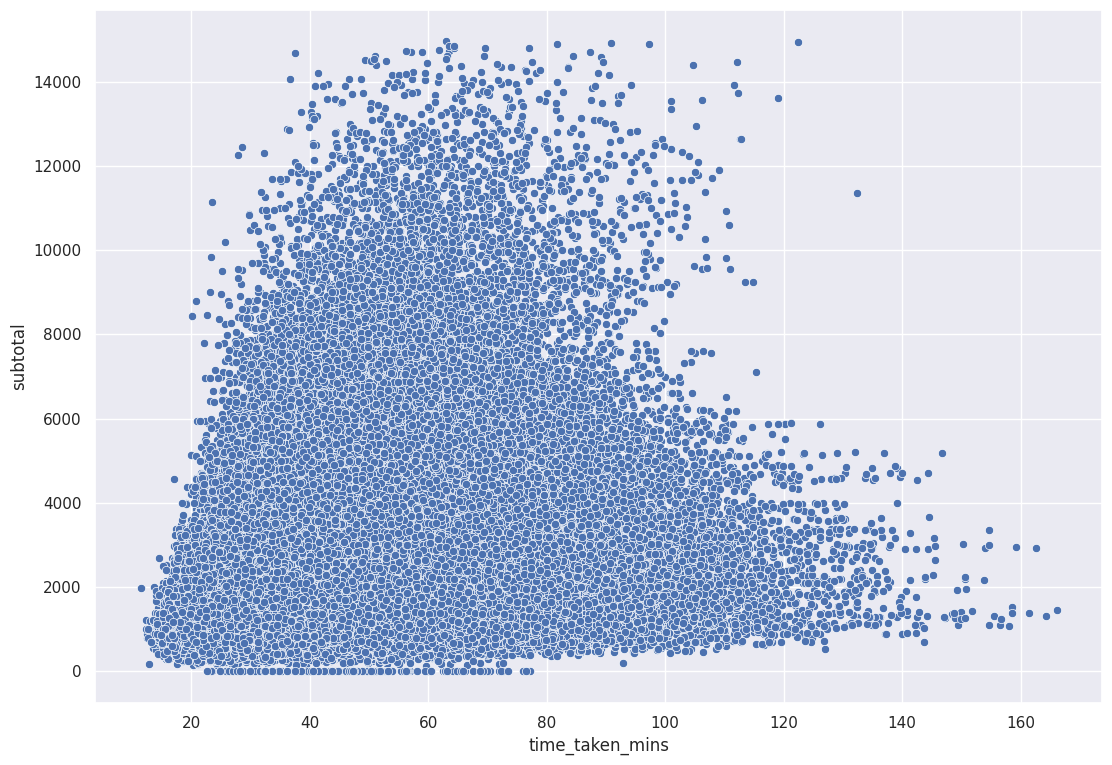

In [ ]:
print("number of outliers : ",(len(df[df['lof_anomaly_score'] == -1]), (df['lof_anomaly_score'] == -1).sum()))
df_1 = df[df['lof_anomaly_score'] == 1]

sns.scatterplot(x='time_taken_mins', y='subtotal', data=df_1)

# drop anomaly column
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

number of outliers :  (1936, 1936)


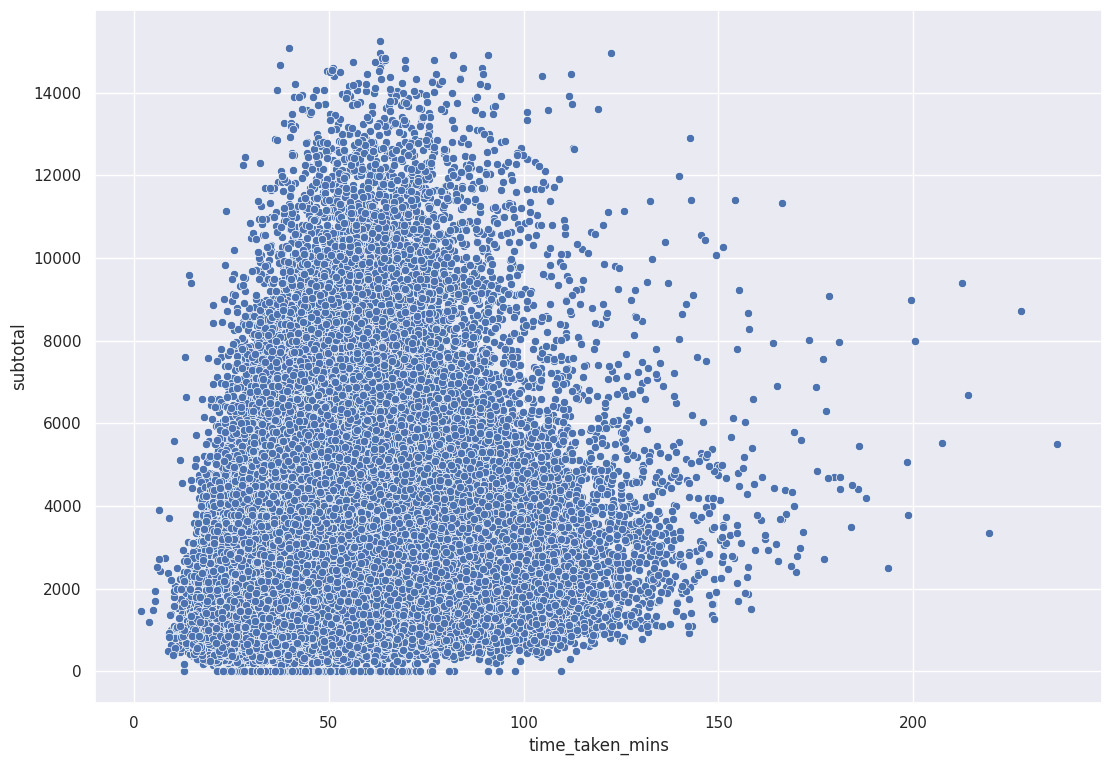

In [ ]:
# Repeat globally
df['lof_anomaly_score'] = model.fit_predict(df)
print("number of outliers : ",(len(df[df['lof_anomaly_score'] == -1]), (df['lof_anomaly_score'] == -1).sum()))
df = df[df['lof_anomaly_score'] == 1]

sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

# drop anomaly column
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

<Axes: xlabel='hour', ylabel='time_taken_mins'>

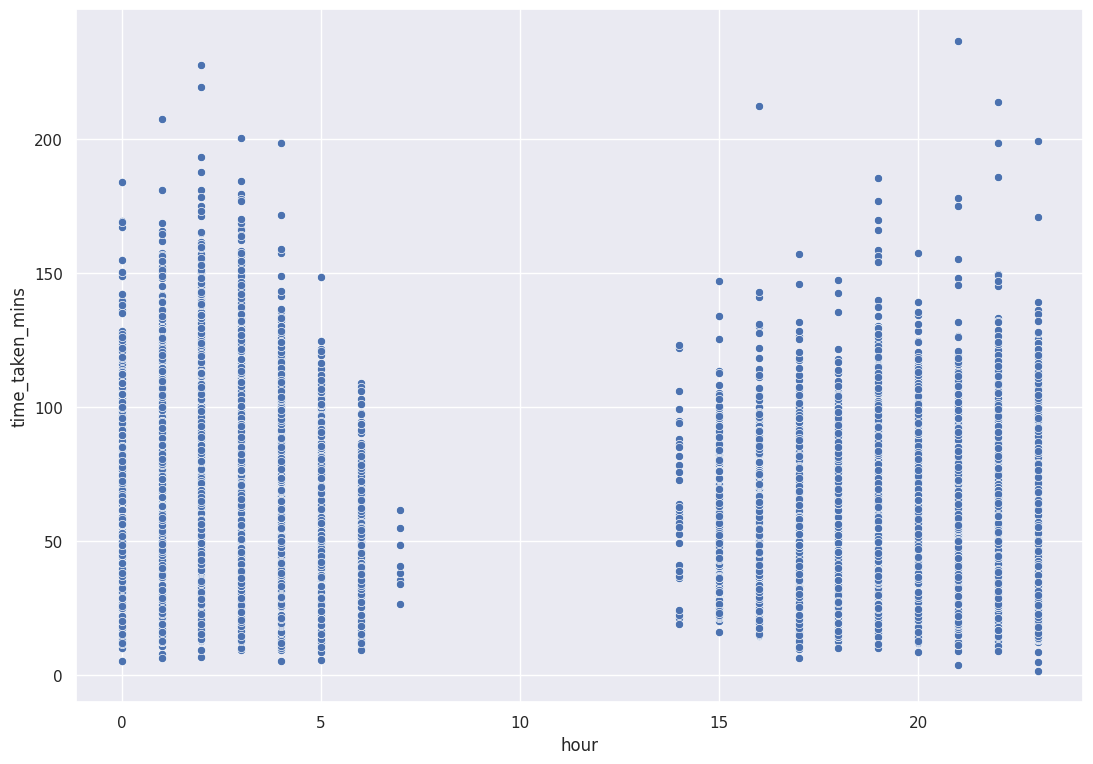

In [ ]:
sns.scatterplot(data=df, x="hour", y="time_taken_mins")

## Task 4: Training Random Forest (Modelling - part 1)

0. Zooming out
1. Data Split
2. Model Random Forest
3. Evaluation metrics and its interpretation
4. Feature importance

In [ ]:
from sklearn.model_selection import train_test_split
# Data_split

y=df['time_taken_mins']
x = df.drop(['time_taken_mins'], axis=1)
df.drop(['time_taken_mins'], axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Model Random Forest
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Prediction
prediction = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, prediction)
print('mae:' ,mae)

r2_score = r2_score(y_test, prediction)
print('r_squared:' ,r2_score)

mse :  227.19266319796785
rmse :  15.072911570030783
mae: 11.243747815434245
r_squared: 0.27819005132202534


In [ ]:
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
print("mape : ",MAPE(y_test, prediction))

mape :  26.164293843785714


Text(0.5, 0, 'Random Forest Feature Importance')

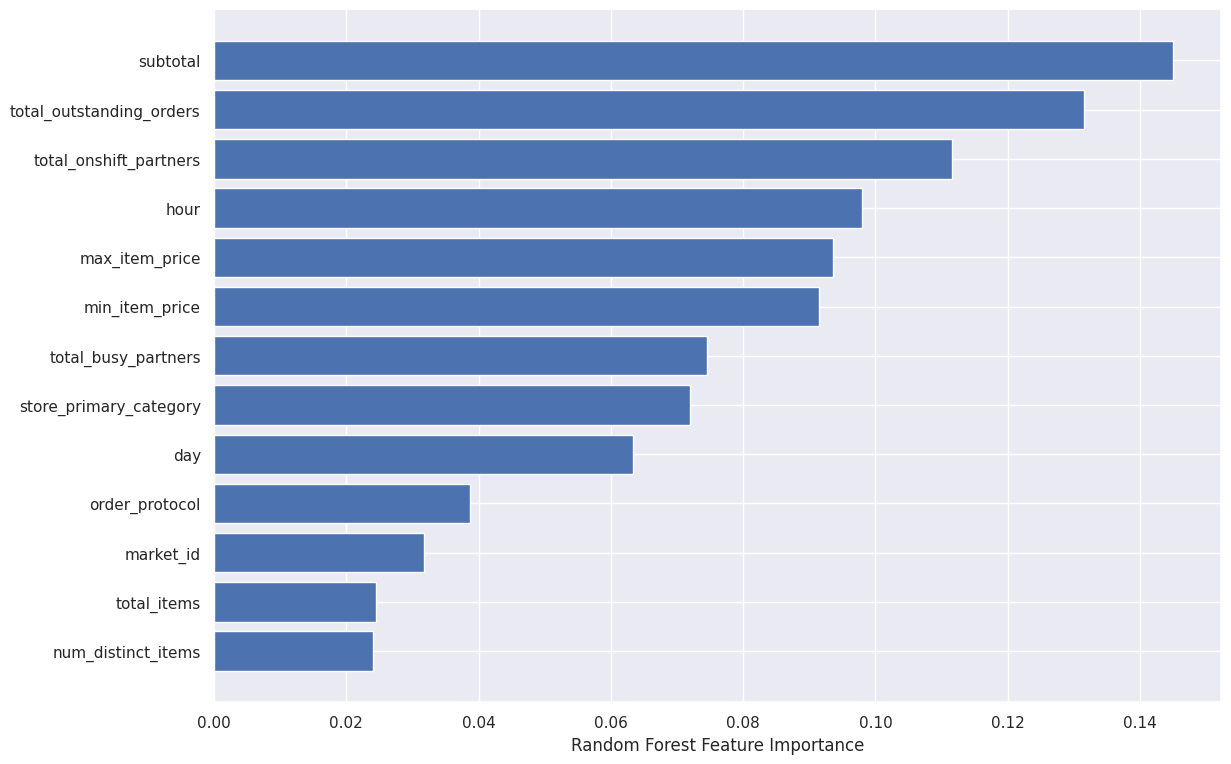

In [ ]:
# Feature importance

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Task 5. Training Neural Networks (Modelling - part 2)

1. scaling of features
2. define model
3. model.fit
4. plots
5. model.predict
5. evaluate

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(14,  kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/30
218/218 [==============================] - 15s 63ms/step - loss: 451.3258 - mse: 451.3258 - mae: 15.5559 - val_loss: 263.1261 - val_mse: 263.1261 - val_mae: 12.1659
Epoch 2/30
218/218 [==============================] - 14s 65ms/step - loss: 254.0378 - mse: 254.0378 - mae: 11.9097 - val_loss: 247.1819 - val_mse: 247.1819 - val_mae: 12.2168
Epoch 3/30
218/218 [==============================] - 14s 64ms/step - loss: 246.4953 - mse: 246.4953 - mae: 11.7417 - val_loss: 237.7373 - val_mse: 237.7373 - val_mae: 11.6402
Epoch 4/30
218/218 [==============================] - 14s 64ms/step - loss: 244.7491 - mse: 244.7491 - mae: 11.6952 - val_loss: 258.9467 - val_mse: 258.9467 - val_mae: 12.8125
Epoch 5/30
218/218 [==============================] - 13s 62ms/step - loss: 243.9237 - mse: 243.9237 - mae: 11.6793 - val_loss: 234.8116 - val_mse: 234.8116 - val_mae: 11.5648
Epoch 6/30
218/218 [==============================] - 14s 63ms/step - loss: 243.0420 - mse: 243.0420 - mae: 11.6495 - va

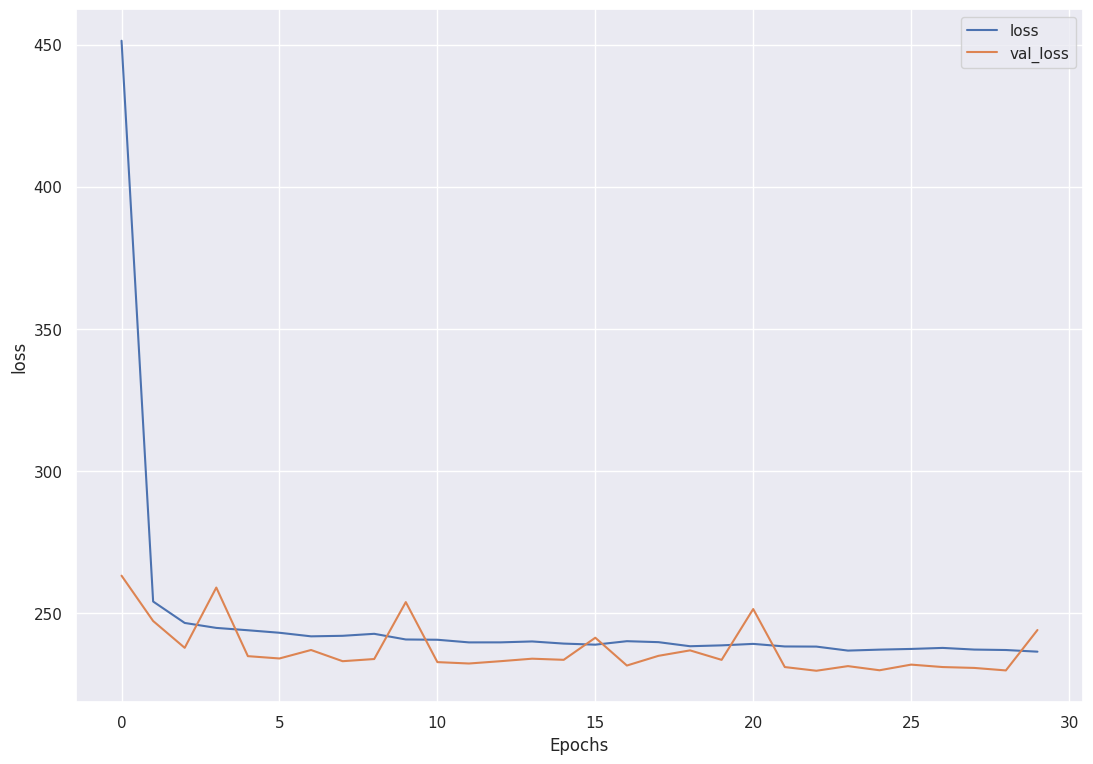

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')

### There is a huge improvement from Random forest MAPE score to Neural Network MAPE score.
* RF = 26.16
* NN =  0.26

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
print("mape : ",MAPE(y_test, prediction))

mape :  0.26164293843785713


**Defining the problem statements and where can this and modifications of this be used?**

### 1. List 3 functions the pandas datetime provides with one line explanation.

* Get ordinal day of the year : df.Time.dt.dayofyear.head()
* Get name of each date  : df.Time.dt.weekday_name.head()
* Get hour detail from time data  : df.Time.dt.hour.head()

### 2. Short note on datetime, timedelta, time span (period)

Timedelta : A timedelta object represents a duration, the difference between two dates or times. All arguments are optional and default to 0 . Arguments may be integers or floats, and may be positive or negative.

Time span: timedelta denotes a span of time. It's the difference between two date , time , or datetime objects. If you add or subtract two date , time , or datetime objects, you'll get a timedelta object.

datetime : The datetime module supplies classes for manipulating dates and times.While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

### 3. Why do we need to check for outliers in our data?

* Identification of potential outliers is important for the following reasons. An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly.

### 4. Name 3 outlier removal methods?

 Most popular outlier detection methods are Z-Score, IQR (Interquartile Range), Mahalanobis Distance, DBSCAN (Density-Based Spatial Clustering of Applications with Noise, Local Outlier Factor (LOF), and One-Class SVM (Support Vector Machine).

### 5. What classical machine learning methods can we use other than random forest for regression?

Linear Regression
Lasso Regression
Ridge Regression
Polynomial Regression

### 6. Why is scaling required for neural networks?

Having features on a similar scale will help the gradient descent converge more quickly towards the minima. Specifically, in the case of Neural Networks Algorithms, feature scaling benefits optimization by: It makes the training faster. It prevents the optimization from getting stuck in local optima.

### 7. Briefly explain your choice of optimizer.


Adam : The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.
The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. It also has advantages of Adagrad [10], which works really well in settings with sparse gradients, but struggles in non-convex optimization of neural networks, and RMSprop [11], which tackles to resolve some of the problems of Adagrad and works really well in on-line settings.

### 8. Which activation function did you use and why?

ReLU : The rectified linear activation function or ReLU is a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

ReLU helps to prevent the exponential growth in the computation required to operate the neural network.

### 9. Why does a neural network perform well on a large dataset?

Training on large datasets helps counter the neural network problem of high variance to a certain extent. The chances of overfitting the training data are drastically reduced when the model is exposed to a larger number of samples of data.


